# E1. Análisis Exploratorio y Preparación del Dataset

**Objetivo:**  
Familiarizarse con una serie temporal real de consumo de recursos (energía o agua), analizar sus componentes y preparar el conjunto de datos para su uso en modelos predictivos, incluyendo la creación de los conjuntos de entrenamiento y validación.

**Duración estimada:** 1h
En este primer ejercicio trabajaremos con **series temporales reales** relacionadas con el consumo de energía. El objetivo es preparar el conjunto de datos para su uso posterior en modelos predictivos.

## Tecnologías utilizadas

- **Pandas**: Para carga, procesamiento y análisis de datos tabulares.
- **Matplotlib & Seaborn**: Para generar visualizaciones estáticas de las series y relaciones entre variables.
- **Statsmodels**: Para realizar la descomposición de la serie en sus componentes (tendencia, estacionalidad y residuo).
- **Python**: Todo el trabajo se realizará en Jupyter o Google Colab con scripts en Python.

## ¿Qué es una serie temporal?

Una **serie temporal** es una secuencia de datos medidos en intervalos regulares de tiempo (diarios, mensuales, anuales...). Su análisis nos permite descubrir patrones como:

- Tendencias a largo plazo
- Estacionalidades o repeticiones periódicas
- Cambios o anomalías

## Flujo de trabajo del ejercicio

```mermaid
flowchart TD
    A[Dataset bruto: consumo energético] --> B[Conversión a frecuencia diaria]
    B --> C[Análisis exploratorio]
    C --> D[Visualización y correlación entre variables]
    D --> E[Descomposición de la serie]
    E --> F[División en conjuntos de entrenamiento y validación]
    F --> G[Datos listos para modelado predictivo]
```
---

## Paso 1: Cargar el dataset

Utilizaremos un dataset con datos diarios de consumo de agua por vivienda o edificio.

In [2]:
import pandas as pd

# Cargar dataset desde archivo CSV
df = pd.read_csv("data/m5_consumo_energia.csv", parse_dates=["dt"])

# Establecer columna temporal como índice
df.set_index("dt", inplace=True)

# Agregamos datos a diario
df = df.groupby(df.index.date).agg({
    'Energia Consumida':'sum',
    'Temperatura':'mean',
    'Humedad':'mean',
})
df = df.round(3)

# Guardar datos agregados
df.to_csv('data/m5_consumo_energia_diario.csv')

# Mostrar las primeras filas
df.head()

,Energia Consumida,Temperatura,Humedad
2024-07-01,191.15,21.710,76.765
2024-07-02,185.83,21.969,73.388
2024-07-03,200.53,22.129,73.098
2024-07-04,197.76,22.161,75.965
2024-07-05,196.79,21.929,76.122


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 184 entries, 2024-07-01 to 2024-12-31
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Energia Consumida  184 non-null    float64
 1   Temperatura        184 non-null    float64
 2   Humedad            184 non-null    float64
dtypes: float64(3)
memory usage: 5.8+ KB


In [4]:
# Estadísticas descriptivas
df.describe()

,Energia Consumida,Temperatura,Humedad
count,184.000000,184.000000,184.000000
mean,198.735326,22.794261,71.336799
std,38.095258,1.744484,10.621661
min,110.290000,18.397000,26.577000
25%,168.532500,21.873000,67.727250
50%,205.590000,23.164500,73.773500
75%,223.840000,23.814000,78.241750
max,300.800000,27.067000,87.700000


> Asegúrate de que el archivo contiene al menos dos columnas:  
> - `fecha`: columna de tipo fecha  
> - `consumo`: valor numérico del consumo diario (litros o m³)

---

## Paso 2: Visualización de los datos

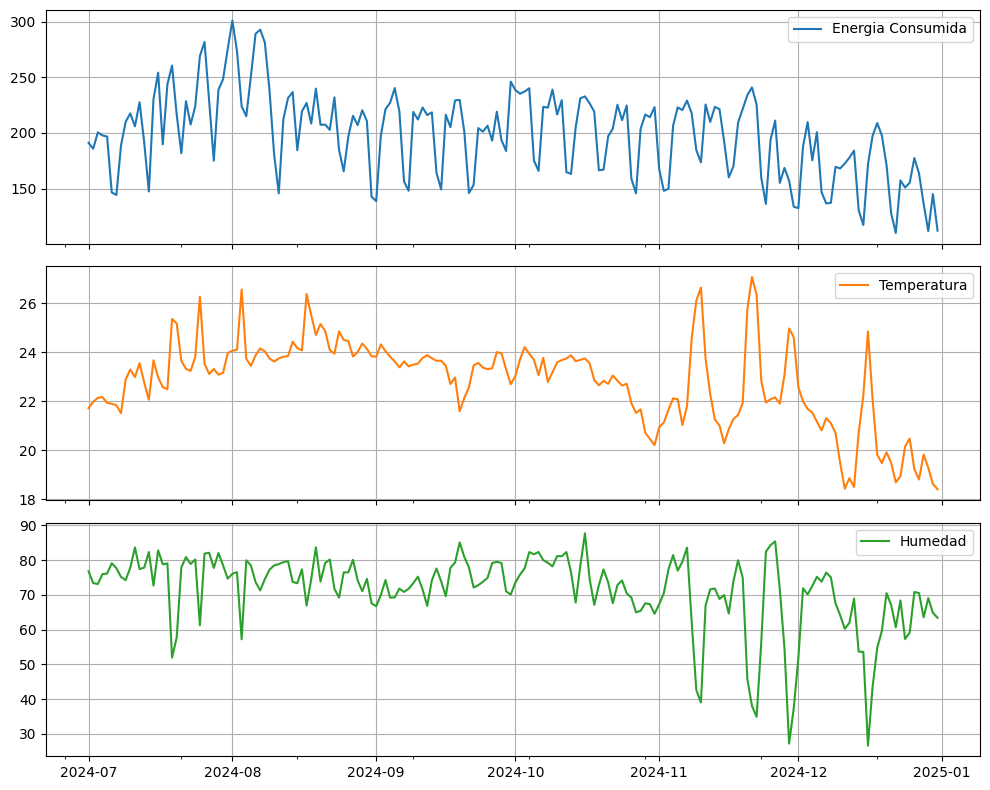

In [5]:
import matplotlib.pyplot as plt
# Visualizar las variables clave
df.plot(subplots=True, figsize=(10, 8), grid=True)
plt.tight_layout()
plt.show()

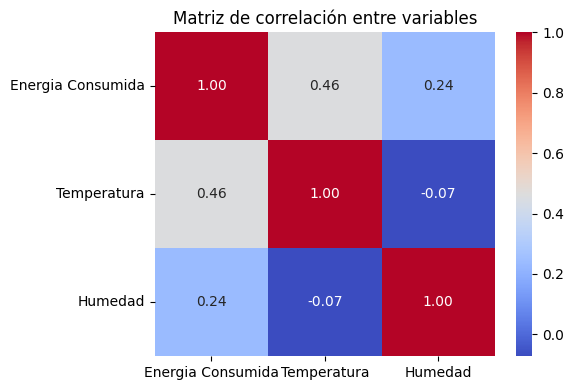

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matriz de correlación
corr = df.corr()

# Representar heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación entre variables")
plt.tight_layout()
plt.show()


---

## Paso 3: Descomposición de la serie

Descomponemos la serie en **tendencia, estacionalidad y residuo** para analizar su comportamiento.

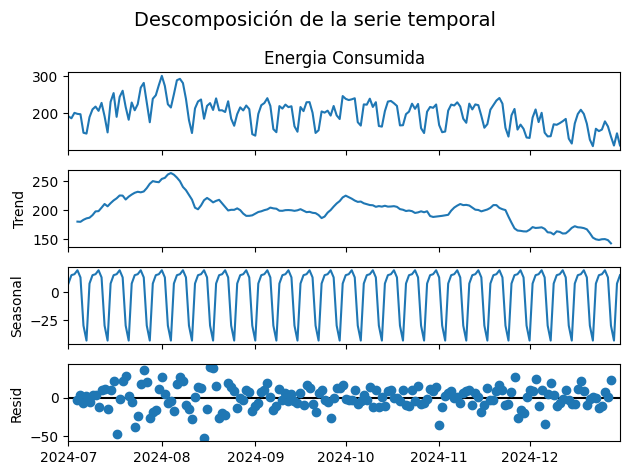

In [7]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Energia Consumida"], model='additive', period=7)  # Periodo semanal

result.plot()
plt.suptitle("Descomposición de la serie temporal", fontsize=14)
plt.tight_layout()
plt.show()

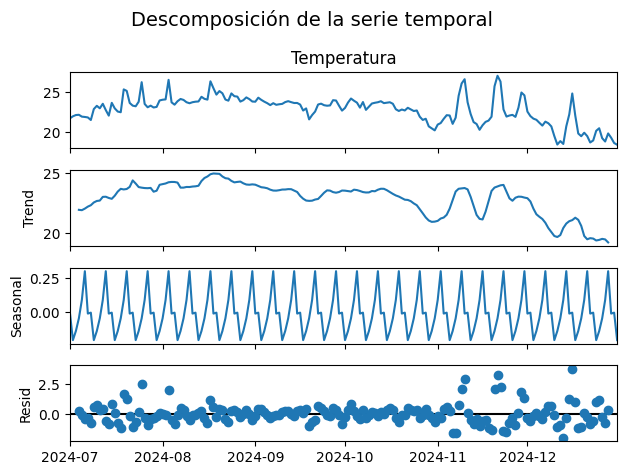

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df["Temperatura"], model='additive', period=7)  # Periodo semanal

result.plot()
plt.suptitle("Descomposición de la serie temporal", fontsize=14)
plt.tight_layout()
plt.show()

---

## Paso 4: Generación de conjuntos de entrenamiento y validación

Vamos a dividir la serie temporal en dos partes:
- **Conjunto de entrenamiento**: ~80% inicial de los datos.
- **Conjunto de validación**: ~20% final, que usaremos para evaluar las predicciones.

In [9]:
# Definir punto de corte
split_index = int(len(df) * 0.9)

train_df = df.iloc[:split_index]
val_df = df.iloc[split_index:]

train_df.to_csv('data/m5_consumo_energia_train.csv')
val_df.to_csv('data/m5_consumo_energia_test.csv')

# Verificar tamaños
print(f"Entrenamiento: {len(train_df)} muestras")
print(f"Validación: {len(val_df)} muestras")

Entrenamiento: 165 muestras
Validación: 19 muestras


Visualizamos ambas particiones:

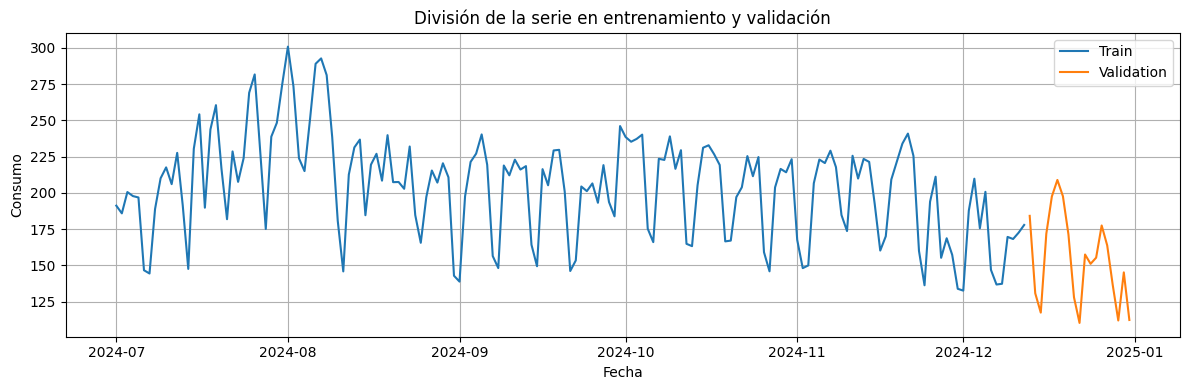

In [10]:
plt.figure(figsize=(12, 4))
plt.plot(train_df.index, train_df["Energia Consumida"], label="Train")
plt.plot(val_df.index, val_df["Energia Consumida"], label="Validation")
plt.title("División de la serie en entrenamiento y validación")
plt.xlabel("Fecha")
plt.ylabel("Consumo")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

## ✅ Resultado

- Una serie temporal descompuesta y visualizada para su análisis.
- Un conjunto de datos limpio, indexado por fecha.
- Las particiones `train` y `val` listas para usar en modelos de predicción.